# ROOT file format example

To run this example, you will need `uproot`, which is another SciKit-HEP library.

In [1]:
import numpy as np
import boost_histogram as bh
import uproot
import os
import matplotlib.pyplot as plt

[ROOT](https://root.cern/) is a modular scientific software toolkit used in High Energy Physics. (HEP) The ROOT file format is used to store almost all HEP data. This notebook will illustrate one method for converting to/from the ROOT file format using uproot, a Python implementation of a ROOT file reader and writer.

For more complicated histograms, you may need Aghast and PyROOT, but that is a much heaver dependency, and is covered [in a separate tutorial](https://scikit-hep.org/scikit-hep-tutorials).

Start by making a 1D histogram:

In [2]:
h = bh.Histogram(bh.axis.Regular(15, -3, 3))
h.fill(np.random.normal(size=1_000_000))

Histogram(Regular(15, -3, 3), storage=Double()) # Sum: 997352.0 (1000000.0 with flow)

In [3]:
with uproot.recreate("demo_uproot_file.root") as root_file:
    # Uproot automatically converts histograms
    root_file["hist"] = h

If you want to save and load the ROOT histogram, use [uproot](https://github.com/scikit-hep/uproot) to read and write:

In [4]:
with uproot.open("demo_uproot_file.root") as root_file_2:
    uproot_hist = root_file_2["hist"]

print(uproot_hist)

<TH1D (version 3) at 0x7fa9b83ffd00>


This uproot histogram can be converted directly to `boost_histogram`:

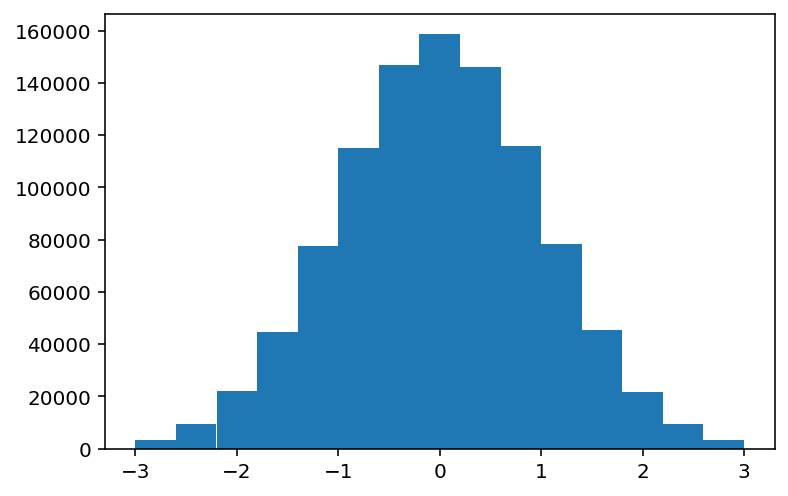

In [5]:
h = bh.Histogram(uproot_hist)
plt.bar(h.axes[0].centers, h.values(), width=h.axes[0].widths);

We could use a `Weight()` storage and read both `allvalues` and `allvariances` in, as well, since ROOT histograms can sometimes have this enabled.

Finally, let's clean up after ourselves:

In [6]:
if os.path.exists("demo_uproot_file.root"):
    os.remove("./demo_uproot_file.root")